# <center>NLP Disaster Tweets Kaggle Mini-Project</center>

# Brief Description of the Problem and Data

To predict whether a given tweet is about a real disaster or not based on its text content.  It is not always straitforward to predict based on the words alone because some tweets may contain words related to disasters but it was meant metaphorically. So we are to build a machine learning model to predicts which tweets are about real disasters and which ones aren't.

#### There are two data files:

| File name      | No. Examples | File size     |
| :---        |    :----:   |          ---: |
| train.csv      | 7503       | 987.71 kB   |
| test.csv   | 3243        | 420.78 kB      |

### Columns
id - a unique identifier for each tweet

text - the text of the tweet

location - the location the tweet was sent from (may be blank)

keyword - a particular keyword from the tweet (may be blank)

target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


# Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

* It is important to check the maximum length of sentences in the training example because if the model doesn't perform well, say because of too much memory used, reduce the max length of input in the model will help.  But doing so will truncate some sentences input, so need to check the cut off length so that not too many example sentences are truncated so the model performance will be affected.

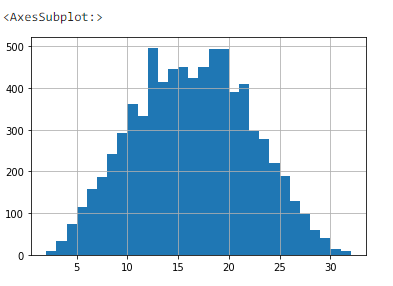

* The lables distribution is pretty even, so no need to worry about class imbalance issue.

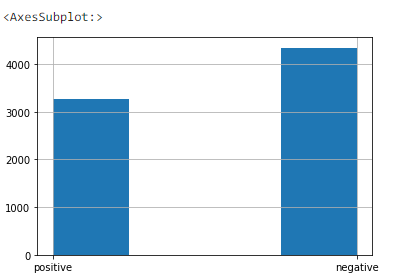

* In the 5 columns of the dataset, there 3 columns are features, namely, text, location, and keyword.  Target is excluded because it is label and id is just identifier so is also excluded.  But location is not useful since it is not related to whether or not the tweet is disaster related or not.  Keyword is quite important in determine if it's disaster related.  It might be a good idea to prepend the keyward to text as input but in this project I decided just to use text as input.

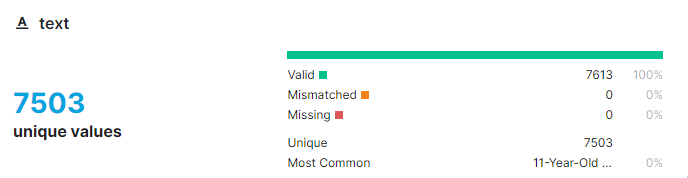

* There is no mismatched or missing text in the dataset.  There are 7613 items in text column and unique items are 7503.  So the only data cleaning task is to remove the duplicates.

* For target (labels), there is no mismatched or missing items.  Just need to remove duplicates.

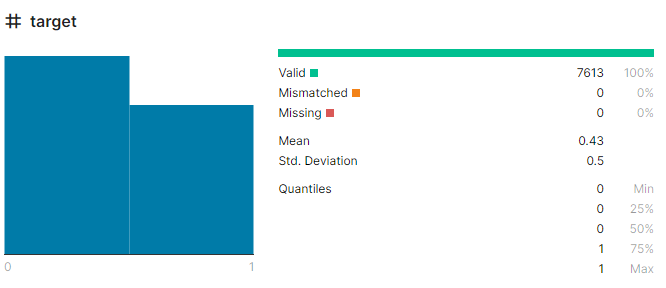

# Model Architecture
## Architecture Selection Reasoning

NLP tasks, such as text classification, are not easy, since learning human language is not easy. Especially given only around 7k examples to train a model, it is difficult to get a good result.  For example, a user's tweet is "On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLASE."  The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.  While NLP deep learning models will be able to classify this tweet with ease because the models will look at the text as a whole instead of looking only at individual word such as "BLAZE."

The good news is there are already many publicly available models that has been pre-trained on tons of corpus (text data) for a long time.  These models have general sense of human language already. We can fine-tune the pre-trained model using the limited small dataset we have and yet it will yield much better result.  One condition is of course the two tasks are similar, which in our case yes since classify tweet's text into disaster related or not is similar to understanding human language.

I will demonstrate the above by training and testing three models, one LSTM model trained only on this kaggle dataset, and two other pre-trained model by fine-tuning.  One is called T5, a transformer (text-to-text) model but pre-trained on multiple NLP tasks, and BERT, basically a transformer encoder, pre-trained on large amount of data in self-supervised fashion, and comparing their results and draw conclusion.

## Word Embedding
### Problem of One-hot encoding and ID encoding approaches
When machine learning models take text as input, they first need to convert the strings into numeric values before they can learn or predict on the texts.  There is one approach called one-hot encoding where you create a zero vector with length of number of total vocabulary and replace zero with one at the index that corresponds to the word.  But the downside is it is sparse, meaning it takes lots of space.  Another approach is encode each word with a unique number.  For example "I am OK" becomes 5,1,4 where 5 represents I, 1 represnets am, and 4 represents OK, it is no longer sparse but it has problem of not capture any relationship between words, also difficult for model to train as number 1, 4, 5 may mean certain quantity to model but actually not the actual relationship between words.

### Advantages of Word Embedding
* Dense representation, save space
* give words meaning as different words are represented as vector at multiple dimensions.  For example, it can capture the sense of analogy that queen is to king as man to woman. The more the dimensions are, the more sophisticated meaning and relationship can be captured by the word embedding.

### Word Embedding method used
Tensorflow's keras api provides Embedding layer that I can use in the model that takes input as text and output word embedding matrix automatically. using it is as simple as adding a keras layer Embedding in the model after the tokenization layer and before the LSTM layer, and specify input and output dimensions.

# Results and Analysis

## Architectures Comparision
### LSTM
#### Model Description
* Each word in input sentence is converted to word embedding vector and feed in RNN network, one embedding corespond to a RNN unit, and the order of word in a sentence is preserved.
* Word embedding vectors are trainable, and the embedding vectors are similar if the words they represent are smililar after training.
* The backbone of this architecture is recurrent neural network (RNN).  It processes sequence input (text or sentences) by iterating through the elements (word or token). RNNs pass the outputs from one timestep to their input on the next timestep.
* The final two layers of keras Dense layers will take the embedding from the encoder and do the final processing, converting them into raw activation (Reason not convert to classification during training is because the Tensorflow api, calculating the logit directly is more efficient)
* Make the RNN bidirectional so context are taken into account from both directions.
* The RNN unit is implemented with LSTM, an improved version, with better performance at long sequence RNN.
#### Architecture Summary
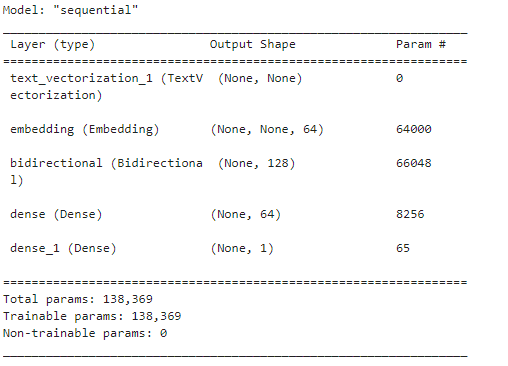
#### Architecture Diagram

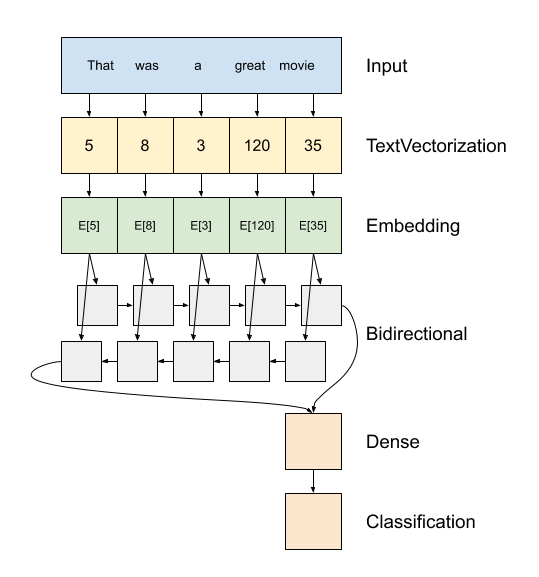
#### Training Result

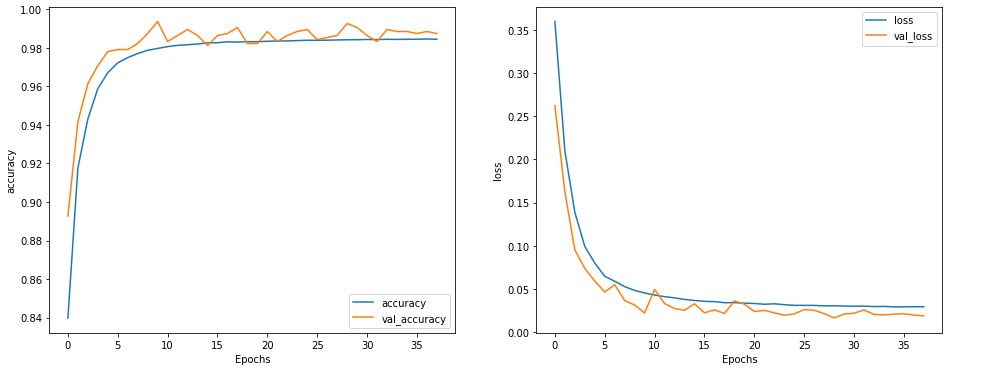

### BERT
#### Model Description

* BERT, a type of transformer (transformer encoder), beats traditinal RNN in almost all NLP tasks.  BERT process each word of input text in the full context of all token before and after, and all these are done in parallel, which makes this mode very efficient and powerful.
* BERT models are usually pre-trained on a large corpus of text, then fine-tuned for specific tasks, and that is exactly I am going to do here.
* BERT pre-trained model has already been trained on huge dataset and it already has very good understanding of human language.  The API I use is called huggingface, which provides a convenient class TFBertForSequenceClassification that allow me to use as a text classifier out of the box.

#### Architecture Summary

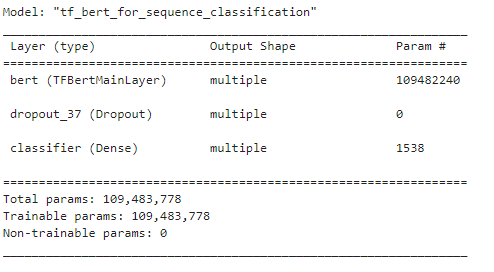

#### Architecture Diagram

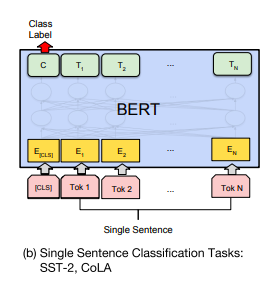

#### Training Result

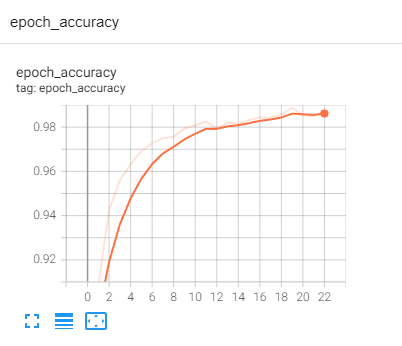

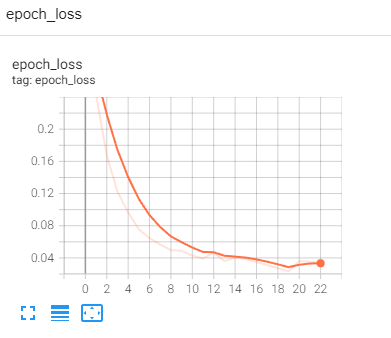

### T5
* T5 is just a classical transformer with encoder and decoder.  It is good at text-to-text NLP tasks such as translation.  
* Another thing makes T5 special is how it is pre-trained.  It was trained with many different tasks, and each task input is prefixed with a tag.  Many of these tasks were pretrained just like BERT with so called unlabeled input, where certain words in a text is masked for T5 to learn and the masked words become labels.  So the pre-trained T5 model can perform many tasks, and already have a good understanding of human languages.
*  All I need to do here is fine-tune T5 on this tweeter topic relatedness task, which T5 should be good at, since the tasks requires a good language model such as T5.
* The only trick left is I need to use T5 on a classification tasks, which all I need to do is to convert the binary classification output (0 and 1) to text, which is simply two sentences, each with only a single word in it, with either "positive" or "negative" as vocabulary.
* Again, I used huggingface API, TFT5ForConditionalGeneration class and pre-traiend weights, for this tasks.

#### Architecture Summary

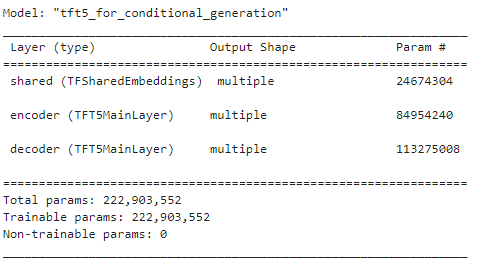

#### Architecture Diagram

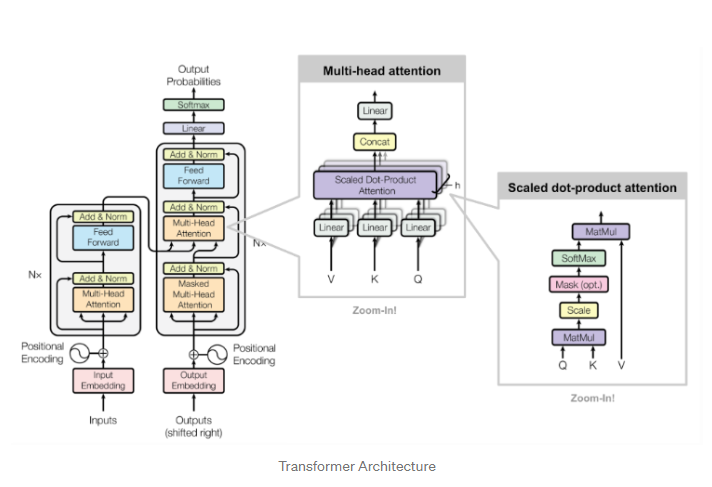

#### Training Result

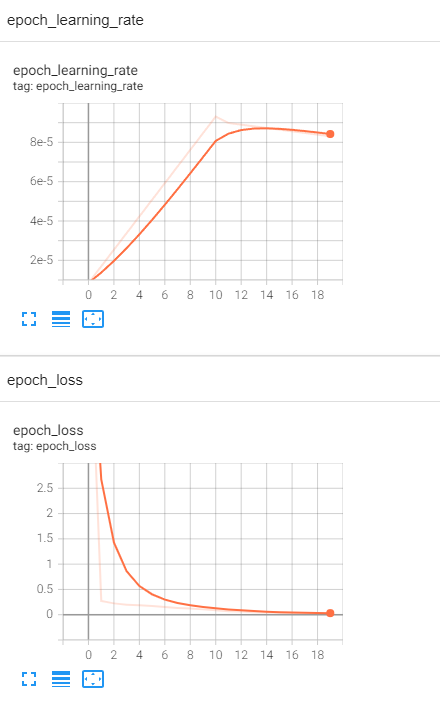

## Hyperparameters Tuning
### LSTM
Potential hyperparameters that can be tuned to help performance 
* add a few LSTM layers and it should help the performance, including tune the layer size, LSTM dimensions.  The more the better only when there are enough dataset examples and hardware resources.
* The max vocabulary size input is set at 1000.  This will generate unknown token in sample input and will hurt the training accuracy.  But increasing it will slow down the training.  By finding an optimal size will help the performance overall.
* Tune the dimensions of dense layer, word embedding layer.
* Training parameters such as learning rate, optimizers, batch size, epoch etc.
* Dataset parameters such as batch size, cache/prefech options, shuffle size etc.

### BERT and T5
There are many options to choose in regards to hyperparameters tuning but since the pre-traiend model already come with optimal configurations, such as learning rate etc, which been tested thoroughly.  So just follow the suggested instructions.  
* The only thing I could try is to try other different varients of BERT, such as Albert, etc, which may have some architectural differences, and/or trained with different datasets or in different training method.
* Others model hyperparameters you might want to try are vocabulary size, hidden size, hiden layer numbers, attention head numbers, dropout rate etc.
* Tokenizer parameters you can set such as convert input texst to lower case or not, truncate input length or not, etc.

## Training Result Comparison

|                                  | LSTM        | BERT-base     | T5      |
| :---                             |    :----:   |          ---: |    |
| Size of pre-trained dataset      | 0           | +10,000 books   | 750GB(cleaned) |
| trainable parameters             | 138k        | 109M      | 223M  |
| Training Accuracy                | 0.98        | 0.98      |   |
| kaggle score                     | 0.63009     | 0.81091   | 0.81887  |

# Conclusion 
## Takeaways
For NLP problems, the old RNN architecture has many weaknesses such as short input sequence length, so it can't train on large dataset.  Therefore they are very prone to overfitting.  The new models such as BERT/GPT/T5 are much powerful and provides much better result but also the large model size limits its usage only for large companies or research institutions.  Fortunately many of the models are pretrained by them and released publicly so regular people can fine-tune them to solve their tasks, which are similar to what the pre-trained model can do, and the fine-tune process is much less demanding in hardware requirement and use much less input training example size and less training time.

## What helped and didn't help the performance
Transfer learning did help the performance by a lot.  The kaggle's accuracy score for LSTM is only 0.63, and that of BERT and T5, both around 0.81, are much higher.  LSTM was trained on the kaggle dataset, which has only 7k training examples.  Even if we were to pre-train LSTM on very large dataset, LSTM wouldn't be able to handle, such as 750G dataset that was used to pre-train T5.

## Future Improvement
For modern NLP models, it is no longer feasible to tune hyperparameter by model users.  The configs comes with the published pre-trained models are pretty optimal.  There are little rooms left to tune the config to improve the performance further.  Having said that, there are other ways to improve on the specific task you have.  Among all the public available models, some are good at generating text, therefore good at chatbot, making up stories, such as GPT, or good at document classifications.  So for the purpose of tweets classification problem, there are many variants of BERT, such as distillBERT, albert, etc, that are better suited for text classification tasks.

# References
https://www.tensorflow.org/text/tutorials/text_classification_rnn
https://huggingface.co/docs/transformers/v4.18.0/en/model_doc/bert
https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03
https://medium.com/@shreyasikalra25/predict-movie-reviews-with-bert-88d8b79f5718
https://www.analyticsvidhya.com/blog/2020/03/6-pretrained-models-text-classification/
https://huggingface.co/docs/transformers/v4.18.0/en/main_classes/tokenizer#transformers.PreTrainedTokenizer

# Appendix
## Source Code

In [ ]:
!mkdir t5_model
!mkdir data
!pip install transformers
!pip install sentencepiece
!pip install tf-models-official


In [ ]:
import os
import pandas as pd
from transformers import T5Tokenizer, BertTokenizer, TFT5ForConditionalGeneration, TFBertForSequenceClassification, T5Config
import tensorflow as tf

In [ ]:
# read csv file
train_pd = pd.read_csv('data/train.csv')

In [ ]:
EXAMPLE_SIZE = train_pd.shape[0]

In [ ]:
# summary
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_pd.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_pd.text.tolist()[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

In [ ]:
train_pd = train_pd.drop(['id', 'keyword', 'location'], axis=1)
train_pd = train_pd.rename(columns={"text": "input_ids", "target": "labels"})

In [ ]:
train_pd['labels'] = train_pd.labels.map(lambda x : 'positive' if x == 1 else 'negative')

In [ ]:
TASK_PREFIX = 'DisasterTweets: '
train_pd['input_ids'] = train_pd.input_ids.map(lambda x : TASK_PREFIX + x)

In [ ]:
train_pd.head()

,input_ids,labels
0,DisasterTweets: Our Deeds are the Reason of th...,positive
1,DisasterTweets: Forest fire near La Ronge Sask...,positive
2,DisasterTweets: All residents asked to 'shelte...,positive
3,"DisasterTweets: 13,000 people receive #wildfir...",positive
4,DisasterTweets: Just got sent this photo from ...,positive


In [ ]:
train_pd[train_pd['labels']=='positive']

,input_ids,labels
0,DisasterTweets: Our Deeds are the Reason of th...,positive
1,DisasterTweets: Forest fire near La Ronge Sask...,positive
2,DisasterTweets: All residents asked to 'shelte...,positive
3,"DisasterTweets: 13,000 people receive #wildfir...",positive
4,DisasterTweets: Just got sent this photo from ...,positive
...,...,...
7608,DisasterTweets: Two giant cranes holding a bri...,positive
7609,DisasterTweets: @aria_ahrary @TheTawniest The ...,positive
7610,DisasterTweets: M1.94 [01:04 UTC]?5km S of Vol...,positive
7611,DisasterTweets: Police investigating after an ...,positive


In [ ]:
train_pd[train_pd['labels']=='negative']

,input_ids,labels
15,DisasterTweets: What's up man?,negative
16,DisasterTweets: I love fruits,negative
17,DisasterTweets: Summer is lovely,negative
18,DisasterTweets: My car is so fast,negative
19,DisasterTweets: What a goooooooaaaaaal!!!!!!,negative
...,...,...
7581,DisasterTweets: @engineshed Great atmosphere a...,negative
7582,DisasterTweets: Cramer: Iger's 3 words that wr...,negative
7584,DisasterTweets: These boxes are ready to explo...,negative
7587,DisasterTweets: Sirens everywhere!,negative


<AxesSubplot:>

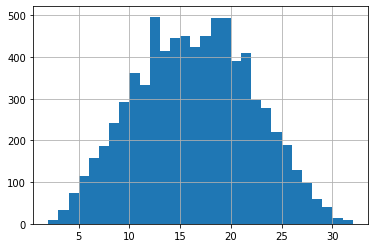

In [ ]:
#training tweets length histogram
tweet_len = [len(i.split()) for i in train_pd.input_ids]
pd.Series(tweet_len).hist(bins = 30)

<AxesSubplot:>

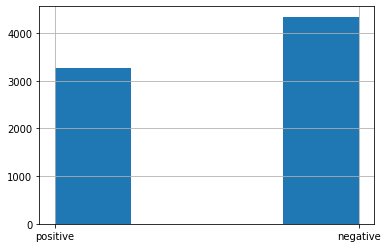

In [ ]:
pd.Series(train_pd.labels).hist(bins = 4)

In [ ]:
T5_MODEL_VER = 1
t5_model_variants = ("t5-small", "t5-base", "t5-large", "t5-3b", "t5-11b")
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_variants[T5_MODEL_VER])

In [ ]:
in_batch_encoding = t5_tokenizer(train_pd['input_ids'].tolist(), padding=True, return_tensors="tf")
targ_batch_encoding = t5_tokenizer(train_pd['labels'].astype(str).tolist(),  max_length=2, return_tensors="tf")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
te = targ_batch_encoding['input_ids'][22]
t5_tokenizer.decode(te)

'negative</s>'

In [ ]:
import tensorflow as tf
ds_train = tf.data.Dataset.from_tensor_slices({'input_ids' : in_batch_encoding.input_ids,
                             'attention_mask' : in_batch_encoding.attention_mask,
                              'labels' : targ_batch_encoding.input_ids,
                              'decoder_attention_mask' : targ_batch_encoding.attention_mask})

In [9]:
def split_dataset(ds, ds_size, val_split=0.1):
    train_size = int((1 - val_split) * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds
def dataset_prepare(dataset, batch_size=32, training=True):
    dataset = dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
    if training:
        dataset = dataset.shuffle(1*1024)
    dataset = dataset.batch(batch_size)
    return dataset

In [ ]:
dataset = dataset_prepare(ds_train)
ds_train, ds_val = split_dataset(dataset, EXAMPLE_SIZE)

In [ ]:
t5_model = TFT5ForConditionalGeneration.from_pretrained(t5_model_variants[T5_MODEL_VER])

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
import numpy as np
import tensorflow as tf
from official.nlp import optimization
import datetime

epochs = 20
batch_size = 32
init_lr = 1e-4

steps_per_epoch = 1406
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = num_train_steps // 10


optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw')

t5_model.compile(optimizer=optimizer, loss='passthrough')

checkpoint_filepath = 't5_model'
t5_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

log_dir = 'tensorboard'
start_profile_batch = steps_per_epoch + 10
stop_profile_batch = start_profile_batch + 100
log_path = log_dir + "/t5/" + datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
t5_tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1,
                                                update_freq=20)

t5_earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
callbacks = [t5_checkpoint, t5_tensorboard, t5_earlystop]

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour, please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [ ]:
history = t5_model.fit(
            x=ds_train,
            validation_data=ds_val,
            callbacks=callbacks,
            epochs=epochs)


Epoch 1/20
238/238 [==============================] - 502s 2s/step - loss: 6.8280
Epoch 2/20
238/238 [==============================] - 453s 2s/step - loss: 0.2682
Epoch 3/20
238/238 [==============================] - 463s 2s/step - loss: 0.2181
Epoch 4/20
238/238 [==============================] - 452s 2s/step - loss: 0.2019
Epoch 5/20
238/238 [==============================] - 457s 2s/step - loss: 0.1860
Epoch 6/20
238/238 [==============================] - 457s 2s/step - loss: 0.1709
Epoch 7/20
238/238 [==============================] - 463s 2s/step - loss: 0.1556
Epoch 8/20
238/238 [==============================] - 466s 2s/step - loss: 0.1342
Epoch 9/20
238/238 [==============================] - 462s 2s/step - loss: 0.1184
Epoch 10/20
238/238 [==============================] - 464s 2s/step - loss: 0.0999
Epoch 11/20
238/238 [==============================] - 464s 2s/step - loss: 0.0866
Epoch 12/20
238/238 [==============================] - 464s 2s/step - loss: 0.0734
Epoch 13/20
2

In [ ]:
t5_model.summary()

Model: "tft5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (TFSharedEmbeddings)  multiple                 24674304  
                                                                 
 encoder (TFT5MainLayer)     multiple                  84954240  
                                                                 
 decoder (TFT5MainLayer)     multiple                  113275008 
                                                                 
Total params: 222,903,552
Trainable params: 222,903,552
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs = t5_tokenizer("DisasterTweets: I went to see a doctor.", return_tensors="tf").input_ids 
outputs = t5_model.generate(inputs)
print(t5_tokenizer.decode(outputs[0], skip_special_tokens=True))

negative


# T5 Testing

In [ ]:
test_pd = pd.read_csv('data/test.csv')
TEST_EXAMPLE_SIZE = test_pd.shape[0]
test_pd.sort_values(by=['id'])
test_pd = test_pd.drop(['keyword', 'location'], axis=1)
test_pd = test_pd.rename(columns={"text": "input_ids"})
TASK_PREFIX = 'DisasterTweets: '
test_pd['input_ids'] = test_pd.input_ids.map(lambda x : TASK_PREFIX + x)

In [ ]:
in_batch_encoding = t5_tokenizer(test_pd.input_ids.tolist(), padding=True, return_tensors="tf")
ds_test_t5 = tf.data.Dataset.from_tensor_slices({'input_ids' : in_batch_encoding.input_ids,
                                                'attention_mask' : in_batch_encoding.attention_mask,
                                                'decoder_input_ids': tf.zeros((TEST_EXAMPLE_SIZE, 1), dtype=tf.int32),
                                                'decoder_attention_mask': tf.ones((TEST_EXAMPLE_SIZE, 1), dtype=tf.int32),})
t5_dataset = dataset_prepare(ds_test_t5, training=False)

In [ ]:
tweet_len = [len(i.split()) for i in test_pd.input_ids]
pd.Series(tweet_len).hist(bins = 30)

In [ ]:
TEST_EXAMPLE_SIZE

3263

In [ ]:
#T5ForConditionalGeneration.generate API doesn't support tensorflow dataset, so need to manually loop through
t5_result = []
for step, input_batch in enumerate(t5_dataset):
    inputs = input_batch['input_ids'] 
    model_output = t5_model.generate(inputs)
    for batch in model_output:
        prediction = t5_tokenizer.decode(batch, skip_special_tokens=True)
        t5_result.append(prediction)

In [ ]:
t5_result[:10]

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative']

In [ ]:
df_lables['target'] = df_lables.target.map(lambda x : int(x == 'negative'))

In [ ]:
df_lables = pd.DataFrame(t5_result)
df_lables.columns = ['target']
df_lables['target'] = df_lables.target.map(lambda x : int(x == 'positive'))
df_submission = pd.concat([df_lables, test_pd], axis=1)
df_submission.to_csv('t5_submission/submission.csv', columns=['id', 'target'], index=False)

In [ ]:
df_submission

,target,id,input_ids
0,0,0,DisasterTweets: Just happened a terrible car c...
1,0,2,DisasterTweets: Heard about #earthquake is dif...
2,0,3,DisasterTweets: there is a forest fire at spot...
3,0,9,DisasterTweets: Apocalypse lighting. #Spokane ...
4,0,11,DisasterTweets: Typhoon Soudelor kills 28 in C...
...,...,...,...
3258,0,10861,DisasterTweets: EARTHQUAKE SAFETY LOS ANGELES ...
3259,0,10865,DisasterTweets: Storm in RI worse than last hu...
3260,0,10868,DisasterTweets: Green Line derailment in Chica...
3261,0,10874,DisasterTweets: MEG issues Hazardous Weather O...


## BERT

In [ ]:
num_classes = 2
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

2022-04-19 16:28:25.671528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:28:25.671742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:28:25.677225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:28:25.677393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:28:25.677535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [ ]:
train_pd = pd.read_csv('data/train.csv')
train_pd = train_pd.drop(['id', 'keyword', 'location'], axis=1)
train_pd = train_pd.rename(columns={"text": "input_ids", "target": "labels"})
EXAMPLE_SIZE = train_pd.shape[0]

In [ ]:
in_batch_encoding = bert_tokenizer(train_pd.input_ids.tolist(), padding=True, return_tensors="tf")
labels = tf.convert_to_tensor(train_pd['labels'])
labels = tf.expand_dims(labels, axis=-1)

tf.Tensor(
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], shape=(7613, 1), dtype=int64)


2

In [ ]:
ds_train_bert = tf.data.Dataset.from_tensor_slices(({'input_ids' : in_batch_encoding.input_ids,
                                                     'attention_mask' : in_batch_encoding.attention_mask},
                                                    labels))

In [ ]:
dataset = dataset_prepare(ds_train_bert)
ds_train, ds_val = split_dataset(dataset, EXAMPLE_SIZE)

In [ ]:
print(bert_tokenizer.decode(bbb[0]['input_ids'][4]))

[CLS] wwi wwii japanese army navy military japan leather watch war mido ww1 2 - full read by ebay http : / / t. co / f9j3l2yjl4 http : / / t. co / mwwwowcayo [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
import keras
log_dir='tensorboard/tb_bert'
model_save_path='bert_model/bert_checkpoint.h5'

callbacks = [keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True),
             keras.callbacks.TensorBoard(log_dir=log_dir),
             keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

print('\nBert Model',bert_model.summary())

bert_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
bert_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)

bert_model.compile(loss=bert_loss,optimizer=bert_optimizer,metrics=metric)

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [ ]:
history=bert_model.fit(
    ds_train,
    batch_size=32,
    epochs=30,
    validation_data=ds_val,
    callbacks=callbacks)


Epoch 1/30
238/238 [==============================] - 75s 316ms/step - loss: 0.3189 - accuracy: 0.8723
Epoch 2/30
238/238 [==============================] - 77s 322ms/step - loss: 0.2426 - accuracy: 0.9084
Epoch 3/30
238/238 [==============================] - 77s 322ms/step - loss: 0.1675 - accuracy: 0.9423
Epoch 4/30
238/238 [==============================] - 77s 325ms/step - loss: 0.1223 - accuracy: 0.9560
Epoch 5/30
238/238 [==============================] - 77s 325ms/step - loss: 0.0964 - accuracy: 0.9631
Epoch 6/30
238/238 [==============================] - 78s 327ms/step - loss: 0.0756 - accuracy: 0.9691
Epoch 7/30
238/238 [==============================] - 78s 327ms/step - loss: 0.0645 - accuracy: 0.9727
Epoch 8/30
238/238 [==============================] - 77s 323ms/step - loss: 0.0567 - accuracy: 0.9750
Epoch 9/30
238/238 [==============================] - 77s 324ms/step - loss: 0.0496 - accuracy: 0.9757
Epoch 10/30
238/238 [==============================] - 78s 327ms/step - l

In [ ]:
predict_encoding = bert_tokenizer("i like swimming", return_tensors="tf")
predict_mask = predict_encoding.attention_mask
predict_inputs = predict_encoding.input_ids 
predict_token_type_ids = predict_encoding.token_type_ids
prediction = bert_model.predict([predict_inputs, predict_mask, predict_token_type_ids])
print(prediction.logits.argmax())

0


# Evaluation

In [ ]:
bert_model.evaluate(dataset)

238/238 [==============================] - 32s 136ms/step - loss: 0.0199 - accuracy: 0.9916


[0.019866501912474632, 0.9915933012962341]

# Testing

In [ ]:
test_pd = pd.read_csv('data/test.csv')
EXAMPLE_SIZE = train_pd.shape[0]
test_pd.sort_values(by=['id'])
test_pd = test_pd.drop(['keyword', 'location'], axis=1)
test_pd = test_pd.rename(columns={"text": "input_ids"})

In [ ]:
test_pd.head()

,id,input_ids
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
in_batch_encoding = bert_tokenizer(test_pd.input_ids.tolist(), padding=True, return_tensors="tf")
ds_test_bert = tf.data.Dataset.from_tensor_slices({'input_ids' : in_batch_encoding.input_ids,
                                                     'attention_mask' : in_batch_encoding.attention_mask})
dataset = dataset_prepare(ds_test_bert, training=False)

In [ ]:
result = bert_model.predict(dataset)

In [ ]:
result.logits[:5]

array([[-4.988735 ,  4.5156918],
       [-4.7153845,  4.0391464],
       [-5.0284176,  4.4436846],
       [-5.0122914,  4.486972 ],
       [-4.900277 ,  4.4168715]], dtype=float32)

In [ ]:
bert_prediction = tf.sigmoid(result.logits)

In [ ]:
bert_prediction[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.00676816, 0.9891823 ],
       [0.00887692, 0.98269236],
       [0.00650655, 0.9883839 ],
       [0.00661163, 0.98887056],
       [0.00738951, 0.98807204]], dtype=float32)>

In [ ]:
bert_result = tf.argmax(bert_prediction, axis=-1)

In [ ]:
bert_result[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 1, 1, 1])>

In [ ]:
df_lables = pd.DataFrame(bert_result)
df_lables.columns = ['target']
test_pd = test_pd.drop(['input_ids'], axis=1)
df_submission = pd.concat([df_lables, test_pd], axis=1)
df_submission.to_csv('bert_submission/submission.csv', index=False)

In [ ]:
df_submission

,target,id
0,1,0
1,1,2
2,1,3
3,1,9
4,1,11
...,...,...
3258,1,10861
3259,1,10865
3260,1,10868
3261,1,10874


In [ ]:
result

<tf.Tensor: shape=(7613,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 0])>

In [ ]:
%load_ext tensorboard

In [ ]:
log_dir='tensorboard/tb_bert'
%tensorboard --logdir {log_dir} --host localhost --port 8083

LSTM

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

train_pd = pd.read_csv('data/train.csv')
train_pd = train_pd.drop(['id', 'keyword', 'location'], axis=1)

EXAMPLE_SIZE = train_pd.shape[0]

In [10]:
import tensorflow as tf
ds_LSTM = tf.data.Dataset.from_tensor_slices((train_pd.text,
                                                    train_pd.target))
ds_LSTM = dataset_prepare(ds_LSTM.repeat())
ds_train_LSTM, ds_val_LSTM = split_dataset(ds_LSTM, EXAMPLE_SIZE)

In [11]:
for example, label in ds_train_LSTM.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  [b'@anellatulip and put the taint there and that all that the magisters did was to open the gates and let the blight get away from it'
 b'The annihilation of Jeb Christie &amp; Kasich is less than 24 hours away..\nPlease God allow me at least one more full day...'
 b'\xc2\x89\xc3\x9b\xc3\x8f@MacDaddy_Leo: ?????? No Caption Needed ??. Freshman... http://t.co/k8ughv2aif\xc2\x89\xc3\x9b\xc2\x9dmy nigga Stacey body bagging niggas! ????'
 b'@TCGReno just hard reset my Xbox'
 b'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/HQsU8LWltH via @usatoday'
 b'People who try to j-walk while an ambulance is passing... I hate you.'
 b'it wasnt a very big stab but it was a deep stab and theres like blood everwhe'
 b'Child Shoulder Bags PVC Shoulder Book Bag Cartoon Cross Body Bags for Girls http://t.co/7l9qAzLjVg http://t.co/Q0hSyfrwEC'
 b'320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\xc2\

In [12]:
VOCAB_SIZE = 1000
LSTM_encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
LSTM_encoder.adapt(ds_train_LSTM.map(lambda text, label: text))

In [13]:
vocab = np.array(LSTM_encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is', 'for',
       'on', 'you', 'my', 'with', 'it', 'that', 'at', 'by', 'this'],
      dtype='<U17')

In [14]:
LSTM_model = tf.keras.Sequential([
    LSTM_encoder,
    tf.keras.layers.Embedding(
        input_dim=len(LSTM_encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
LSTM_earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
LSTM_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [18]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [ ]:
history = LSTM_model.fit(ds_train_LSTM, epochs=50,
                    validation_data=ds_val_LSTM,
                    validation_steps=30,
                    callbacks=[LSTM_earlystop])

Epoch 1/50
6851/6851 [==============================] - 217s 30ms/step - loss: 0.3598 - accuracy: 0.8398 - val_loss: 0.2622 - val_accuracy: 0.8927
Epoch 2/50
6851/6851 [==============================] - 203s 30ms/step - loss: 0.2099 - accuracy: 0.9176 - val_loss: 0.1626 - val_accuracy: 0.9417
Epoch 3/50
6851/6851 [==============================] - 202s 29ms/step - loss: 0.1389 - accuracy: 0.9431 - val_loss: 0.0952 - val_accuracy: 0.9615
Epoch 4/50
6851/6851 [==============================] - 203s 30ms/step - loss: 0.0993 - accuracy: 0.9589 - val_loss: 0.0739 - val_accuracy: 0.9708
Epoch 5/50
6851/6851 [==============================] - 199s 29ms/step - loss: 0.0801 - accuracy: 0.9672 - val_loss: 0.0591 - val_accuracy: 0.9781
Epoch 6/50
6851/6851 [==============================] - 197s 29ms/step - loss: 0.0648 - accuracy: 0.9723 - val_loss: 0.0466 - val_accuracy: 0.9792
Epoch 7/50
6851/6851 [==============================] - 197s 29ms/step - loss: 0.0590 - accuracy: 0.9750 - val_loss: 0

In [ ]:
#!mkdir LSTM_model
CHECKPOINT_PATH = 'LSTM_model/DisasterTweets-1'
checkpoint = tf.train.Checkpoint(LSTM_model)
checkpoint.restore(CHECKPOINT_PATH)

In [ ]:
CHECKPOINT_PATH = 'LSTM_model/DisasterTweets'
checkpoint = tf.train.Checkpoint(LSTM_model)
save_path = checkpoint.save(CHECKPOINT_PATH)

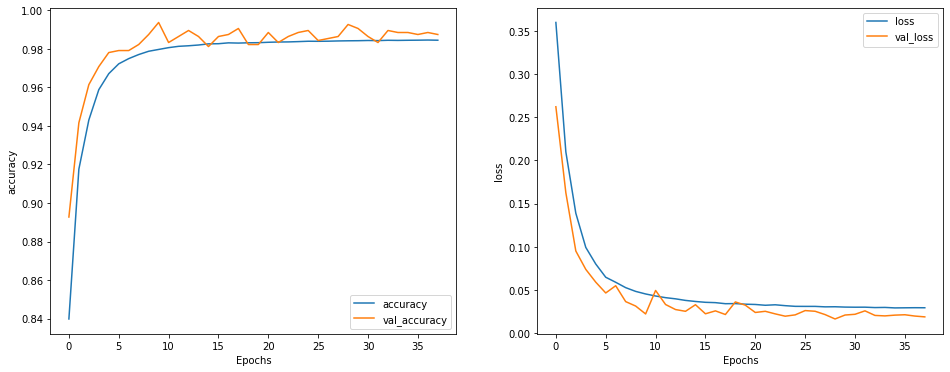

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [ ]:
test_pd = pd.read_csv('data/test.csv')
test_pd = test_pd.drop(['keyword', 'location'], axis=1)
test_pd.sort_values(by=['id'])
EXAMPLE_SIZE = test_pd.shape[0]

In [ ]:
ds_LSTM_test = tf.data.Dataset.from_tensor_slices(test_pd.text)
ds_LSTM_test = dataset_prepare(ds_LSTM_test, training=False)

In [ ]:
LSTM_logits = LSTM_model.predict(ds_LSTM_test)

In [ ]:
LSTM_pred = tf.cast((tf.sigmoid(LSTM_logits) > 0.5), tf.int32)

In [ ]:
df_lables = pd.DataFrame(LSTM_pred.numpy())
df_lables.columns = ['target']
df_submission = pd.concat([df_lables, test_pd], axis=1)
df_submission.to_csv('LSTM_submission/submission.csv', 
                     columns=['id', 'target'], 
                     index=False)

In [ ]:
test_pd

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


Your most recent submission scored 0.81887, which is an improvement of your previous score of 0.81091. 
lstm 0.63009.